<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тема 1. Введение в нейронные сети
##1. От регрессии к нейросети

Рассмотрим переход от линейной регрессии к нейронным сетям.





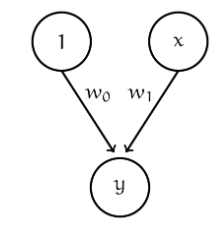

 Представим, что наблюдается графическое представление линейной регрессии, выраженной уравнением:  
$$y = w_0 + w_1 \cdot x.$$
Это стандартная формула, где $y$ зависит линейно от $x$. Теперь возникает вопрос: как можно модифицировать эту модель, чтобы сделать зависимость нелинейной?


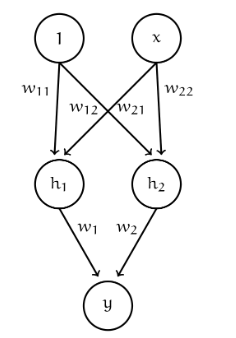


Для иллюстрации введём промежуточные вычисления через скрытые слои. Пусть скрытый слой представлен двумя нейронами, а их выходы обозначены как $h_1$ и $h_2$. Эти величины рассчитываются следующим образом:  
$$h_1 = w_{11} \cdot 1 + w_{21} \cdot x,$$
$$h_2 = w_{12} \cdot 1 + w_{22} \cdot x.$$
Итоговое значение $y$ вычисляется с использованием этих промежуточных величин:  
$$y = w_1 \cdot h_1 + w_2 \cdot h_2.$$

Подставляя выражения для $h_1$ и $h_2$, получаем:  
$$y = w_1 \cdot (w_{11} + w_{21} \cdot x) + w_2 \cdot (w_{12} + w_{22} \cdot x).$$
Раскрывая скобки:  
$$y = (w_1 w_{11} + w_2 w_{12}) + (w_1 w_{21} + w_2 w_{22}) \cdot x.$$

Таким образом, это уравнение всё ещё представляет собой линейную зависимость, несмотря на введение скрытого слоя. Чтобы сделать модель нелинейной, необходимо применить к промежуточным величинам $h_i$ нелинейную функцию. Например, можно использовать сигмоиду:  
$$f(h) = \frac{1}{1 + e^{-h}}.$$

Тогда итоговая формула будет выглядеть так:  
$$y = w_1 \cdot f(w_{11} + w_{21} \cdot x) + w_2 \cdot f(w_{12} + w_{22} \cdot x).$$

Применение функции активации устраняет линейность. Таким образом, преобразование линейной регрессии в нейронную сеть достигается за счёт добавления скрытого слоя и применения к его выходам функции активации.

Для функций активации могут использоваться разные варианты. Одной из популярных в современных нейронных сетях является ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$

Эта функция нелинейна и вычисляется просто. Кроме того, она обладает рядом полезных свойств, которые будут подробно рассмотрены в дальнейших материалах.



##2. От картинки к формуле

Рассмотрим процесс прогнозирования заполняемости кофейни с использованием нейронной сети. Модель принимает три входных параметра: температуру за окном ($x_1$), факт наличия митинга на улице ($x_2$) и пол бариста ($x_3$), где мужчина обозначается как $0$, а женщина как $1$. В качестве функции активации используется ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$



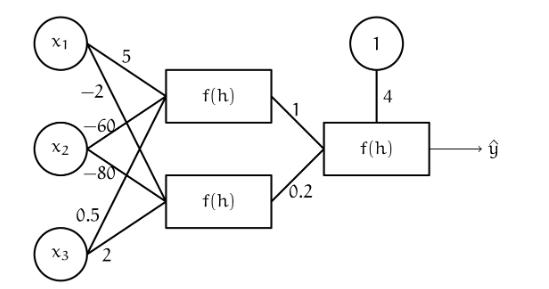


#### Пример прогноза

Для заданных условий:  
- $x_1 = 20$ (температура 20 градусов),  
- $x_2 = 0$ (митинга нет),  
- $x_3 = 1$ (за стойкой стоит женщина),  

выполним поэтапные вычисления для каждого слоя нейронной сети.  





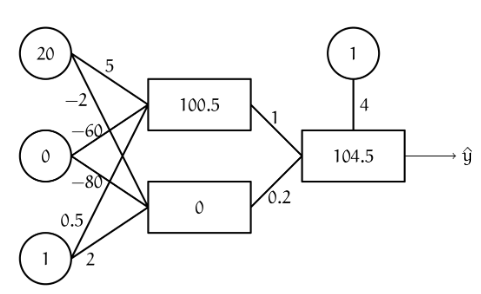


1. **Вычисление значений скрытого слоя**  
   Для первого нейрона:  
   $$
   h_1 = \text{ReLU}(5 \cdot x_1 + (-60) \cdot x_2 + 0.5 \cdot x_3) = \text{ReLU}(5 \cdot 20 + (-60) \cdot 0 + 0.5 \cdot 1) = \text{ReLU}(100.5) = 100.5.
  $$
   Для второго нейрона:  
   $$
   h_2 = \text{ReLU}(-2 \cdot x_1 + (-80) \cdot x_2 + 2 \cdot x_3) = \text{ReLU}(-2 \cdot 20 + (-80) \cdot 0 + 2 \cdot 1) = \text{ReLU}(-38) = 0.
  $$

2. **Выходной слой**  
   Итоговое значение прогнозируется по формуле:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1).
  $$
   Подставляя значения $h_1$ и $h_2$:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot 100.5 + 0.2 \cdot 0 + 4 \cdot 1) = \text{ReLU}(104.5) = 104.5.
  $$

Таким образом, прогнозируемое число посетителей в кофейне составляет $104.5$.  





#### Нейросеть как функция

Нейронная сеть, по сути, представляет собой нелинейную функцию, которую можно записать аналитически. Построим её пошагово, начиная с выходного слоя:  
$$
\hat{y} = f(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1),
$$  
где $f(h) = \text{ReLU}(h)$. Подставим выражения для скрытых слоёв $h_1$ и $h_2$:  
$$
\hat{y} = f(f(5x_1 - 60x_2 + 0.5x_3) + 0.2 \cdot f(-2x_1 - 80x_2 + 2x_3) + 4).
$$  
Развёрнутая формула описывает работу нейронной сети. Обучение сети эквивалентно подбору параметров (весов) этой нелинейной функции для достижения максимальной точности предсказания.  



Таким образом, модель нейросети — это способ обобщения данных в виде композиции линейных операций и функций активации, которые формируют сложную нелинейную зависимость между входными и выходными параметрами.











##3. Из формулы в картинку

Рассмотрим функцию:  
$$
y = \max(0, 4 \cdot \max(0, 3 \cdot x_1 + 4 \cdot x_2 + 1) + 2 \cdot \max(0, 3 \cdot x_1 + 2 \cdot x_2 + 7) + 6).
$$  
Эта функция описывает процесс вычислений в нейронной сети. Переведём её в графическое представление нейросети, начиная с выходного слоя.  



#### Выходной слой  
Итоговый выход нейронной сети представлен как:  
$$
\hat{y} = \text{ReLU}(4 \cdot h_1 + 2 \cdot h_2 + 6),
$$  
где $h_1$ и $h_2$ — выходы скрытых нейронов первого слоя. Функция активации $\text{ReLU}(h)$ равна:  
$$
\text{ReLU}(h) = \max(0, h).
$$  



#### Скрытый слой  
Каждый из нейронов первого слоя также вычисляет комбинацию входных значений $x_1$ и $x_2$, используя линейное преобразование с последующим применением функции активации ReLU.  

1. Для первого нейрона:  
$$
h_1 = \text{ReLU}(3 \cdot x_1 + 4 \cdot x_2 + 1).
$$  

2. Для второго нейрона:  
$$
h_2 = \text{ReLU}(3 \cdot x_1 + 2 \cdot x_2 + 7).
$$  



#### Архитектура нейросети  
На основе полученных выражений можно выделить следующие уровни:  
1. **Входной слой**: принимает значения $x_1$ и $x_2$.  
2. **Первый скрытый слой**: содержит два нейрона, которые вычисляют значения $h_1$ и $h_2$.  
3. **Выходной слой**: объединяет результаты $h_1$ и $h_2$ с помощью линейной комбинации и функции активации ReLU.  



Таким образом, нейронная сеть имеет следующую структуру:  
- Два входа ($x_1$, $x_2$).  
- Два нейрона на первом скрытом слое, каждый из которых выполняет линейное преобразование и применяет ReLU.  
- Один нейрон на выходном слое, который использует результаты первого слоя для вычисления итогового значения.  


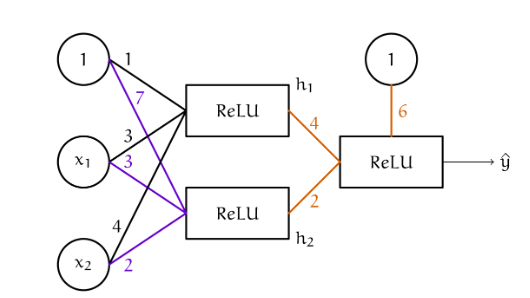


Эта архитектура может быть визуализирована в виде сети с входным слоем, двумя скрытыми нейронами и одним выходным.












##4. Армия регрессий

Рассмотрим последовательность задач, связанных с использованием персептронов для решения различных логических и классификационных задач. Каждая задача иллюстрирует принципы настройки весов и активационных функций в простых нейронных сетях.





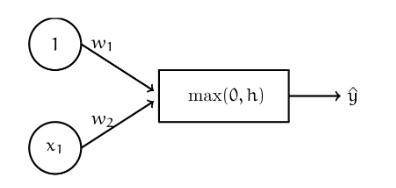

#### Часть (а): Реализация логического отрицания

Для реализации функции логического отрицания ($\text{NOT}$), где:
- если $x_1 = 0$, то выход $\hat{y} = 1$,
- если $x_1 = 1$, то выход $\hat{y} = 0$,

мы используем персептрон с функцией активации ReLU, заданной формулой:
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_1),
$$
где:
- $w_1$ — смещение (bias),
- $w_2$ — вес, связанный с входным значением $x_1$,
- $\max(0, \cdot)$ — функция активации ReLU, которая возвращает максимум между 0 и аргументом.



### Условия для работы персептрона
Для корректной реализации логического отрицания персептрон должен удовлетворять следующим условиям:
1. При $x_1 = 0$: $\hat{y} = 1$.
   - Подставляем $x_1 = 0$ в формулу:
     $$
     \hat{y} = \max(0, w_1 + w_2 \cdot 0) = \max(0, w_1).
     $$
     Чтобы $\hat{y} = 1$, необходимо, чтобы $w_1 = 1$, так как только в этом случае ReLU вернет значение 1.

2. При $x_1 = 1$: $\hat{y} = 0$.
   - Подставляем $x_1 = 1$ в формулу:
     $$
     \hat{y} = \max(0, w_1 + w_2 \cdot 1) = \max(0, w_1 + w_2).
     $$
     Чтобы $\hat{y} = 0$, выражение $w_1 + w_2$ должно быть $\leq 0$, так как ReLU возвращает 0, если её аргумент неположителен.



### Подбор параметров $w_1$ и $w_2$
Из первого условия мы уже определили, что $w_1 = 1$. Подставим это значение во второе условие:
$$
w_1 + w_2 \leq 0.
$$
Подставляем $w_1 = 1$:
$$
1 + w_2 \leq 0.
$$
Отсюда:
$$
w_2 \leq -1.
$$

Таким образом, один из возможных наборов параметров:
$$
w_1 = 1, \quad w_2 = -1.
$$



### Проверка работы персептрона
Проверим, что выбранные параметры $w_1 = 1$ и $w_2 = -1$ действительно реализуют логическое отрицание.

#### Случай 1: $x_1 = 0$
Подставляем $x_1 = 0$ в формулу:
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_1) = \max(0, 1 + (-1) \cdot 0) = \max(0, 1) = 1.
$$
Результат: $\hat{y} = 1$, что соответствует ожидаемому значению.

#### Случай 2: $x_1 = 1$
Подставляем $x_1 = 1$ в формулу:
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_1) = \max(0, 1 + (-1) \cdot 1) = \max(0, 0) = 0.
$$
Результат: $\hat{y} = 0$, что также соответствует ожидаемому значению.

Таким образом, мы показали, что персептрон с параметрами $w_1 = 1$ и $w_2 = -1$ корректно реализует логическое отрицание. Важно отметить, что выбор $w_2 = -1$ не единственный: любое значение $w_2 \leq -1$ также будет работать, так как оно удовлетворяет условию $w_1 + w_2 \leq 0$.

**Ответ:**
$$
\boxed{w_1 = 1, \, w_2 = -1}.
$$


x1: [0 1]
z = w1 + w2 * x1: [1 0]
y_hat = ReLU(z): [1 0]


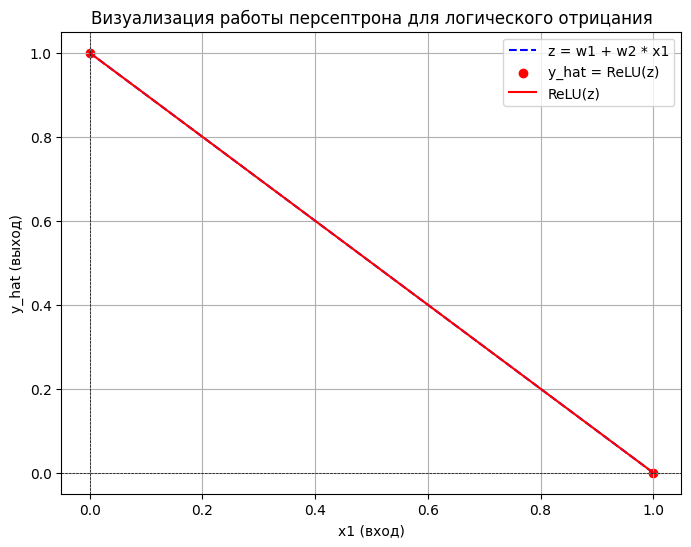

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации ReLU
def relu(z):
    return np.maximum(0, z)

# Параметры персептрона
w1 = 1  # Смещение (bias)
w2 = -1 # Вес для x1

# Входные значения x1
x1_values = np.array([0, 1])

# Вычисление выходов y_hat
z_values = w1 + w2 * x1_values  # Линейная комбинация
y_hat_values = relu(z_values)   # Применение ReLU

# Вывод результатов
print("x1:", x1_values)
print("z = w1 + w2 * x1:", z_values)
print("y_hat = ReLU(z):", y_hat_values)

# Визуализация
plt.figure(figsize=(8, 6))

# График линейной комбинации z
plt.plot(x1_values, z_values, 'b--', label='z = w1 + w2 * x1')

# График выходов y_hat после ReLU
plt.scatter(x1_values, y_hat_values, color='red', label='y_hat = ReLU(z)')
plt.plot(x1_values, y_hat_values, 'r-', label='ReLU(z)')

# Добавление меток и легенды
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Горизонтальная линия y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Вертикальная линия x=0
plt.xlabel('x1 (вход)')
plt.ylabel('y_hat (выход)')
plt.title('Визуализация работы персептрона для логического отрицания')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()


#### Часть (б): Обучение персептрона на нескольких примерах

Для реализации персептрона, который обрабатывает три входа ($x_1, x_2, x_3$) и выдает значения $y$, воспользуемся таблицей:  

| $x_1$ | $x_2$ | $x_3$ | $y$  |  
|--|--|--|-|  
| 1      | 1      | 2      | 0.5   |  
| 1      | -1     | 1      | 0     |  




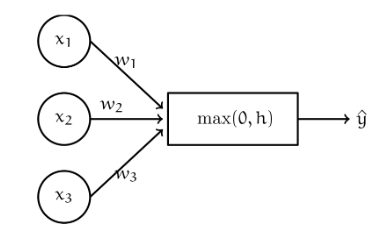

Функция активации задана как:
$$
\hat{y} = \max(0, w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3),
$$
где:
- $w_1$ — смещение (bias),
- $w_2, w_3$ — веса для входных значений $x_2$ и $x_3$,
- $\max(0, \cdot)$ — функция активации ReLU, которая возвращает максимум между 0 и аргументом.

Наша цель — подобрать значения $w_1$, $w_2$, $w_3$, чтобы персептрон корректно воспроизводил выходные значения $y$ из таблицы.



### **2. Составление уравнений**

Из таблицы данных составим два уравнения, соответствующих двум строкам:

#### Уравнение 1: Для первой строки ($x_1 = 1, x_2 = 1, x_3 = 2, y = 0.5$)
Подставляем значения в формулу:
$$
\hat{y} = \max(0, w_1\cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3).
$$
При $x_2 = 1$, $x_3 = 2$, $\hat{y} = 0.5$:
$$
\max(0, w_1 \cdot 1+ w_2 \cdot 1 + w_3 \cdot 2) = 0.5.
$$

#### Уравнение 2: Для второй строки ($x_1 = 1, x_2 = -1, x_3 = 1, y = 0$)
Подставляем значения в формулу:
$$
\hat{y} = \max(0, w_1\cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3).
$$
При $x_1 = 1$, $x_2 = -1$, $x_3 = 1$, $\hat{y} = 0$:
$$
\max(0, w_1 \cdot 1 + w_2 \cdot (-1) + w_3 \cdot 1) = 0.
$$

Таким образом, мы получаем систему двух уравнений:
1. $\max(0, w_1 + w_2 + 2 \cdot w_3) = 0.5,$
2. $\max(0, w_1 - w_2 + w_3) = 0.$



### **3. Анализ системы уравнений**

#### Уравнение 1:
$$
\max(0, w_1 + w_2 + 2 \cdot w_3) = 0.5.
$$
Здесь выражение внутри $\max(0, \cdot)$ должно быть равно 0.5, так как ReLU возвращает значение больше 0:
$$
w_1 + w_2 + 2 \cdot w_3 = 0.5.
$$

#### Уравнение 2:
$$
\max(0, w_1 - w_2 + w_3) = 0.
$$
Здесь выражение внутри $\max(0, \cdot)$ должно быть $\leq 0$, так как ReLU возвращает 0:
$$
w_1 - w_2 + w_3 \leq 0.
$$



### **4. Подбор параметров**

Мы выбираем $w_1 = 0$, $w_3 = 0$, $w_2 = 0.5$. Проверим, удовлетворяют ли эти значения обоим уравнениям.

#### Проверка Уравнения 1:
Подставляем $w_1 = 0$, $w_2 = 0.5$, $w_3 = 0$ в первое уравнение:
$$
w_1 + w_2 + 2 \cdot w_3 = 0 + 0.5 + 2 \cdot 0 = 0.5.
$$
Это удовлетворяет первому уравнению.

#### Проверка Уравнения 2:
Подставляем $w_1 = 0$, $w_2 = 0.5$, $w_3 = 0$ во второе уравнение:
$$
w_1 - w_2 + w_3 = 0 - 0.5 + 0 = -0.5.
$$
Значение $-0.5 \leq 0$, что удовлетворяет второму уравнению.



### **5. Почему это решение работает?**

1. **Первое уравнение**:
   - При $w_1 = 0$, $w_2 = 0.5$, $w_3 = 0$, линейная комбинация $w_1 + w_2 + 2 \cdot w_3$ равна 0.5.
   - Функция ReLU возвращает положительное значение, то есть $\hat{y} = 0.5$, что совпадает с ожидаемым выходом.

2. **Второе уравнение**:
   - При $w_1 = 0$, $w_2 = 0.5$, $w_3 = 0$, линейная комбинация $w_1 - w_2 + w_3$ равна $-0.5$.
   - Функция ReLU возвращает 0 для отрицательных значений, то есть $\hat{y} = 0$, что также совпадает с ожидаемым выходом.



### **6. Заключение**

Выбранные параметры $w_1 = 0$, $w_2 = 0.5$, $w_3 = 0$ удовлетворяют обоим уравнениям:
- Первое уравнение дает $\hat{y} = 0.5$ благодаря положительному значению линейной комбинации.
- Второе уравнение дает $\hat{y} = 0$ благодаря отрицательному значению линейной комбинации, которое обнуляется функцией ReLU.

Таким образом, это решение корректно реализует персептрон для заданных входных данных.

**Ответ:**
$$
\boxed{w_1 = 0, \, w_2 = 0.5, \, w_3 = 0.}
$$

Результаты работы персептрона:
x2 = 1, x3 = 2, z = 0.50, y_expected = 0.5, y_predicted = 0.50
x2 = -1, x3 = 1, z = -0.50, y_expected = 0, y_predicted = 0.00


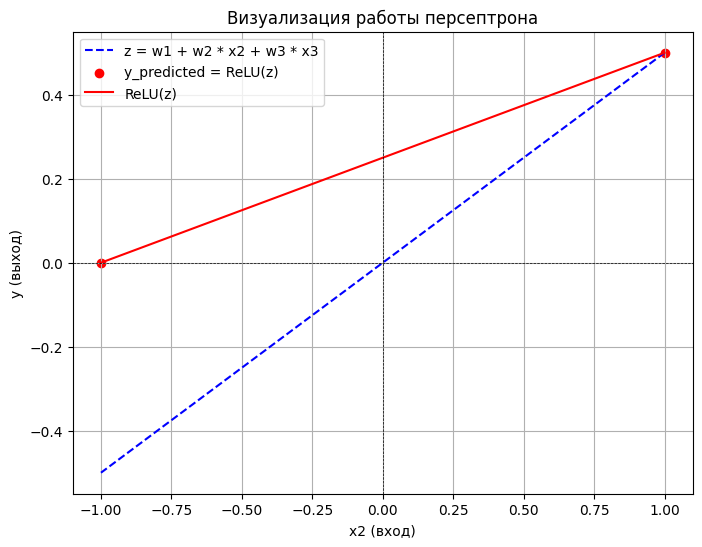

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации ReLU
def relu(z):
    return np.maximum(0, z)

# Параметры персептрона
w1 = 0   # Смещение (bias)
w2 = 0.5 # Вес для x2
w3 = 0   # Вес для x3

# Входные данные (x2, x3) и ожидаемые выходы y
data = [
    {"x2": 1, "x3": 2, "y": 0.5},  # Первая строка таблицы
    {"x2": -1, "x3": 1, "y": 0}    # Вторая строка таблицы
]

# Вычисление выходов персептрона
results = []
for row in data:
    x2 = row["x2"]
    x3 = row["x3"]
    y_expected = row["y"]

    # Линейная комбинация
    z = w1 + w2 * x2 + w3 * x3

    # Применение ReLU
    y_predicted = relu(z)

    results.append({
        "x2": x2,
        "x3": x3,
        "z": z,
        "y_expected": y_expected,
        "y_predicted": y_predicted
    })

# Вывод результатов
print("Результаты работы персептрона:")
for result in results:
    print(f"x2 = {result['x2']}, x3 = {result['x3']}, "
          f"z = {result['z']:.2f}, y_expected = {result['y_expected']}, "
          f"y_predicted = {result['y_predicted']:.2f}")

# Визуализация
plt.figure(figsize=(8, 6))

# График линейной комбинации z
x_values = [row["x2"] for row in data]
z_values = [result["z"] for result in results]
plt.plot(x_values, z_values, 'b--', label='z = w1 + w2 * x2 + w3 * x3')

# График выходов y_predicted после ReLU
y_predicted_values = [result["y_predicted"] for result in results]
plt.scatter(x_values, y_predicted_values, color='red', label='y_predicted = ReLU(z)')
plt.plot(x_values, y_predicted_values, 'r-', label='ReLU(z)')

# Добавление меток и легенды
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Горизонтальная линия y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Вертикальная линия x=0
plt.xlabel('x2 (вход)')
plt.ylabel('y (выход)')
plt.title('Визуализация работы персептрона')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

## Часть 3 : Классификация точек на плоскости



## 3.1. Введение

Сейчас на простом примере разберём, как работает многослойная нейронная сеть. Задача будет полностью геометрической, что позволит нам «увидеть», что происходит на каждом слое. Мы научимся:

- понимать, почему одного слоя нейронов иногда недостаточно;
- строить двухслойную сеть «вручную», подбирая веса аналитически;
- познакомимся с методом наименьших квадратов как способом настройки параметров;
- реализовывать такую сеть на Python.

## 3.2. Постановка задачи

Рассмотрим плоскость с координатами $(x_1, x_2)$. На ней проведены две прямые:
$$
x_1 + x_2 = 1,\qquad x_1 - x_2 = 1.
$$
Эти прямые делят плоскость на четыре области (рис. 1). Требуется построить нейронную сеть, которая по координатам любой точки $(x_1, x_2)$ определяет, в какой из четырёх областей она находится.

**Входные данные:** координаты точки $(x_1, x_2)$.  
**Функция активации:** функция Хевисайда (ступенька):
$$
H(h) = \begin{cases}
1, & h > 0,\\
0, & h \le 0.
\end{cases}
$$
Точки, лежащие точно на прямой, будем относить к «нижней» или «левой» стороне (при $h=0$ выход нейрона равен 0). Это соглашение можно изменить, но для определённости мы его примем.

**Выход сети:** номер области: 1, 2, 3 или 4.

## 3.3. Геометрический анализ: от прямых к бинарным признакам

Каждая прямая делит плоскость на две половины. Введём два простых вопроса к точке:

1. Лежит ли точка **выше** прямой $x_1 + x_2 = 1$?
   - Если да ($x_1 + x_2 > 1$), обозначим ответ как $y_1 = 1$.
   - Если нет ($x_1 + x_2 \le 1$), обозначим $y_1 = 0$.

2. Лежит ли точка **правее** прямой $x_1 - x_2 = 1$?
   - Если да ($x_1 - x_2 > 1$), $y_2 = 1$.
   - Если нет ($x_1 - x_2 \le 1$), $y_2 = 0$.

Комбинируя ответы на эти два вопроса, мы можем однозначно указать область:

| Область | Условия | $y_1$ | $y_2$ | Номер класса |
|:-------:|:--------|:------:|:------:|:------------:|
| 1 | выше первой **и** правее второй | 1 | 1 | 1 |
| 2 | выше первой **и** не правее второй | 1 | 0 | 2 |
| 3 | не выше первой **и** правее второй | 0 | 1 | 3 |
| 4 | не выше первой **и** не правее второй | 0 | 0 | 4 |

Пара $(y_1, y_2)$ — это бинарный код, который однозначно определяет класс. Теперь задача свелась к двум подзадачам:

- получать $y_1$ и $y_2$ по координатам точки;
- по паре $(y_1, y_2)$ восстанавливать номер класса.

Первую подзадачу решает **скрытый слой**, вторую — **выходной слой**.


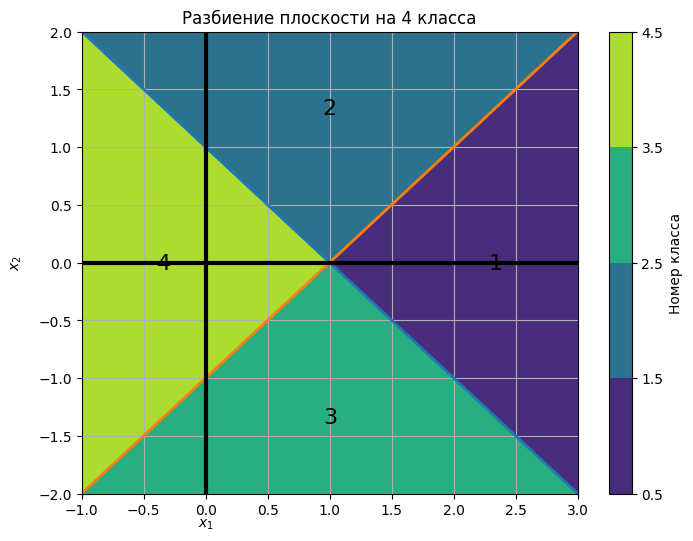

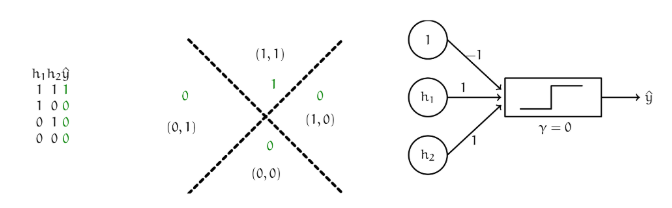


## 3.4. Почему нельзя обойтись одним нейроном?


Один нейрон можно представить как линию, проведенную на плоскости, которая отделяет один класс данных от другого. Например, уравнение линии вида $x_1 + x_2 - 1 = 0$ может быть описано с помощью нейрона.


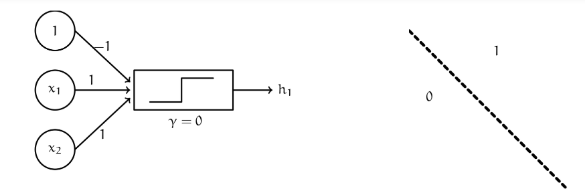


- Для первой линии ($x_1 + x_2 = 1$):  
  $$
  h_1 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = 1, \gamma = 1.
 $$



Порог $\gamma$ для кусочной функции в определенном смысле дублирует константу. Эти два параметра взаимосвязаны, и в нашем анализе мы будем всегда считать его равным нулю. Если комбинация $x_1$, $x_2$ и 1 оказывается больше нуля, это указывает на то, что мы находимся справа от прямой. В случае необходимости поменять метки 0 и 1 местами, достаточно умножить все коэффициенты на -1.





Один нейрон может провести на плоскости только одну прямую и отделить одну область от остальных. Чтобы выделить четыре области, нужны как минимум две прямые, а значит, и два нейрона в первом слое.

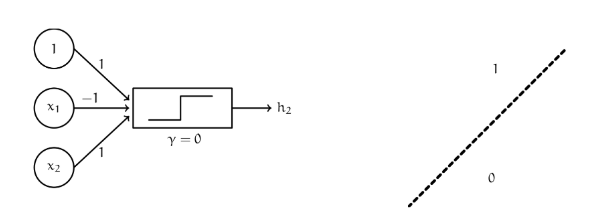

- Для второй линии ($x_1 - x_2 = 1$):  
  $$
  h_2 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = -1, \gamma = 1.
 $$


Таким образом, первый персептрон определяет позицию относительно первой прямой, а второй — относительно второй. Далее необходимо объединить полученные результаты. Нейрон для логической операции «И» должен реализовать соответствующую логическую функцию, которую задает таблица истинности. В этой таблице также приведены примеры весов, которые могли бы объединить выходные данные первого слоя в итоговый прогноз.



## 3.5. Архитектура сети

Наша сеть состоит из:

- **Входной слой:** 2 нейрона (принимают значения $x_1$ и $x_2$ и передают их дальше).
- **Скрытый слой:** 2 нейрона с функцией активации Хевисайда.
- **Выходной слой:** 1 нейрон (линейный, вычисляет взвешенную сумму).


Схематично:
```
x1 ──┬──►(нейрон A)── y1
     │
x2 ──┼──►(нейрон B)── y2
     │
     └──►(выходной нейрон) ──► class
```


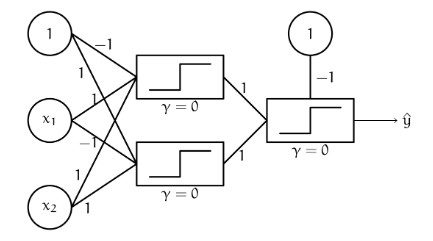


## 3.6. Прямой проход: вычисления шаг за шагом

### 3.6.1. Скрытый слой

**Нейрон A** проверяет, лежит ли точка выше первой прямой. Его взвешенная сумма (предактивация):
$$
h_1 = 1\cdot x_1 + 1\cdot x_2 - 1 = x_1 + x_2 - 1.
$$
Коэффициенты взяты из уравнения прямой $x_1 + x_2 - 1 = 0$. Если $h_1 > 0$, точка выше прямой, и нейрон выдаёт $y_1 = 1$; иначе $y_1 = 0$.

**Нейрон B** проверяет, лежит ли точка правее второй прямой:
$$
h_2 = 1\cdot x_1 + (-1)\cdot x_2 - 1 = x_1 - x_2 - 1,
$$
$$
y_2 = H(h_2) = \begin{cases}
1, & x_1 - x_2 > 1,\\
0, & x_1 - x_2 \le 1.
\end{cases}
$$

Мы вручную подобрали веса и смещения, исходя из уравнений прямых. В реальных задачах сеть будет учиться подбирать их автоматически.

### 3.6.2. Выходной слой: от $(y_1, y_2)$ к номеру класса

Теперь у нас есть два бинарных сигнала $y_1$ и $y_2$. Нужно превратить их в номер класса. Будем искать линейную комбинацию:
$$
\text{class} = \alpha y_1 + \beta y_2 + \gamma,
$$
где $\alpha, \beta, \gamma$ — коэффициенты, которые мы подберём так, чтобы для каждой комбинации $(y_1, y_2)$ получался правильный класс.



#### 3.6.2.1. Простой способ: решение системы уравнений

Подставляем все четыре варианта из таблицы:

- $(1,1)$: $\alpha + \beta + \gamma = 1$
- $(1,0)$: $\alpha + \gamma = 2$
- $(0,1)$: $\beta + \gamma = 3$
- $(0,0)$: $\gamma = 4$

Из последнего уравнения сразу находим $\gamma = 4$. Тогда из второго $\alpha = -2$, из третьего $\beta = -1$. Проверяем первое: $-2 -1 +4 = 1$ — верно.

Итак, простой способ даёт:
$$
\boxed{\text{class} = -2y_1 - y_2 + 4}.
$$



#### 3.6.2.2. Метод наименьших квадратов (МНК)

В реальных задачах данных обычно много, и они могут быть противоречивы (например, из-за шума). Тогда точное решение системы невозможно, и параметры подбирают так, чтобы минимизировать сумму квадратов ошибок. Этот подход называется **методом наименьших квадратов**. Покажем, как он работает для нашей задачи, хотя здесь данные непротиворечивы и МНК даст тот же результат.

Составим функцию потерь — сумму квадратов отклонений предсказаний от желаемых значений:
$$
S(\alpha,\beta,\gamma) = \sum_{i=1}^{4} \bigl( \alpha y_{1i} + \beta y_{2i} + \gamma - d_i \bigr)^2,
$$
где $d_i$ — желаемый класс для $i$-й комбинации $(y_{1i}, y_{2i})$.

Запишем данные в виде таблицы для удобства:

| $i$ | $y_{1i}$ | $y_{2i}$ | $d_i$ |
|:----:|:----------:|:----------:|:------:|
| 1 | 1 | 1 | 1 |
| 2 | 1 | 0 | 2 |
| 3 | 0 | 1 | 3 |
| 4 | 0 | 0 | 4 |

Минимум функции $S$ достигается в точке, где все частные производные равны нулю. Вычислим производные по $\alpha, \beta, \gamma$ и приравняем их к нулю (множитель 2 сократим):

$$
\frac{\partial S}{\partial \alpha} = \sum_i y_{1i}(\alpha y_{1i} + \beta y_{2i} + \gamma - d_i) = 0,
$$
$$
\frac{\partial S}{\partial \beta} = \sum_i y_{2i}(\alpha y_{1i} + \beta y_{2i} + \gamma - d_i) = 0,
$$
$$
\frac{\partial S}{\partial \gamma} = \sum_i (\alpha y_{1i} + \beta y_{2i} + \gamma - d_i) = 0.
$$

Раскрывая скобки, получаем систему нормальных уравнений:

$$
\begin{cases}
\bigl(\sum y_{1i}^2\bigr)\alpha + \bigl(\sum y_{1i}y_{2i}\bigr)\beta + \bigl(\sum y_{1i}\bigr)\gamma = \sum y_{1i}d_i,\\[4pt]
\bigl(\sum y_{1i}y_{2i}\bigr)\alpha + \bigl(\sum y_{2i}^2\bigr)\beta + \bigl(\sum y_{2i}\bigr)\gamma = \sum y_{2i}d_i,\\[4pt]
\bigl(\sum y_{1i}\bigr)\alpha + \bigl(\sum y_{2i}\bigr)\beta + 4\gamma = \sum d_i.
\end{cases}
$$

Теперь подставим числовые значения сумм, которые легко найти из таблицы:

- $\sum y_{1i} = 1+1+0+0 = 2$
- $\sum y_{2i} = 1+0+1+0 = 2$
- $\sum d_i = 1+2+3+4 = 10$
- $\sum y_{1i}^2 = 1^2+1^2+0^2+0^2 = 2$
- $\sum y_{2i}^2 = 1^2+0^2+1^2+0^2 = 2$
- $\sum y_{1i}y_{2i} = 1\cdot1 + 1\cdot0 + 0\cdot1 + 0\cdot0 = 1$
- $\sum y_{1i}d_i = 1\cdot1 + 1\cdot2 + 0\cdot3 + 0\cdot4 = 3$
- $\sum y_{2i}d_i = 1\cdot1 + 0\cdot2 + 1\cdot3 + 0\cdot4 = 4$

Подставляем:

$$
\begin{cases}
2\alpha + 1\beta + 2\gamma = 3 \quad &(1)\\
1\alpha + 2\beta + 2\gamma = 4 \quad &(2)\\
2\alpha + 2\beta + 4\gamma = 10 \quad &(3)
\end{cases}
$$

Решаем систему. Вычтем (1) из (2): $-\alpha + \beta = 1$ ⇒ $\beta = \alpha + 1$.  
Подставим $\beta$ в (1): $2\alpha + (\alpha+1) + 2\gamma = 3$ ⇒ $3\alpha + 2\gamma = 2$.   (4)  
Подставим $\beta$ в (3): $2\alpha + 2(\alpha+1) + 4\gamma = 10$ ⇒ $4\alpha + 4\gamma = 8$ ⇒ $\alpha + \gamma = 2$.   (5)  
Из (5) $\gamma = 2 - \alpha$. Подставим в (4): $3\alpha + 2(2-\alpha) = 2$ ⇒ $3\alpha + 4 - 2\alpha = 2$ ⇒ $\alpha = -2$.  
Тогда $\beta = -1$, $\gamma = 4$.

Мы получили те же коэффициенты! Это не случайно: при непротиворечивых данных МНК даёт точное решение системы. Однако если бы данные содержали ошибки, МНК позволил бы найти наилучшее приближение.

### 3.6.3. Полная формула

Подставляя выражения для $y_1$ и $y_2$, получаем итоговую формулу, которая по координатам точки сразу выдаёт номер класса:
$$
\boxed{\text{class}(x_1, x_2) = -2\,H(x_1 + x_2 - 1) - H(x_1 - x_2 - 1) + 4}.
$$

### 3.6.4. Матричная запись (для знакомых с линейной алгеброй)

Вектор входа $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$.  
Матрица весов скрытого слоя $W^{(1)} = \begin{bmatrix}1 & 1\\ 1 & -1\end{bmatrix}$, смещения $\mathbf{b}^{(1)} = \begin{bmatrix}-1 \\ -1\end{bmatrix}$.  
Тогда предактивации: $\mathbf{h}^{(1)} = W^{(1)}\mathbf{x} + \mathbf{b}^{(1)}$,  
выход скрытого слоя: $\mathbf{a}^{(1)} = H(\mathbf{h}^{(1)})$ (поэлементно).  
Выходной слой: $\text{class} = W^{(2)}\mathbf{a}^{(1)} + b^{(2)}$, где $W^{(2)} = \begin{bmatrix}-2 & -1\end{bmatrix}$, $b^{(2)} = 4$.  
Компактно:  
$$
\text{class}(\mathbf{x}) = W^{(2)}\,H\!\bigl(W^{(1)}\mathbf{x} + \mathbf{b}^{(1)}\bigr) + b^{(2)}.
$$

## 3.7. Численные примеры

Убедимся, что сеть правильно классифицирует точки из всех четырёх областей.

**Пример 1 (область 1).** $(x_1, x_2) = (2.0, 0.5)$  
$h_1 = 2.0+0.5-1=1.5>0 \Rightarrow y_1=1$  
$h_2 = 2.0-0.5-1=0.5>0 \Rightarrow y_2=1$  
$\text{class} = -2\cdot1 -1 +4 = 1$ ✓

**Пример 2 (область 2).** $(0.8, 0.5)$  
$h_1 = 0.8+0.5-1=0.3>0 \Rightarrow y_1=1$  
$h_2 = 0.8-0.5-1=-0.7\le0 \Rightarrow y_2=0$  
$\text{class} = -2\cdot1 -0 +4 = 2$ ✓

**Пример 3 (область 3).** $(0.2, -1.0)$  
$h_1 = 0.2-1.0-1=-1.8\le0 \Rightarrow y_1=0$  
$h_2 = 0.2-(-1.0)-1=0.2>0 \Rightarrow y_2=1$  
$\text{class} = -2\cdot0 -1 +4 = 3$ ✓

**Пример 4 (область 4).** $(0, 0)$  
$h_1 = 0+0-1=-1\le0 \Rightarrow y_1=0$  
$h_2 = 0-0-1=-1\le0 \Rightarrow y_2=0$  
$\text{class} = -2\cdot0 -0 +4 = 4$ ✓

Все примеры работают верно.

## 3.8. Поведение на границах

Мы приняли $H(0)=0$, поэтому точки, лежащие точно на прямой $x_1+x_2=1$ (или $x_1-x_2=1$), относятся к полупространству с $y_i=0$. Если требуется иная трактовка, можно:

- изменить определение функции Хевисайда (например, считать $H(0)=1$);
- добавить малый сдвиг $\pm\varepsilon$ к смещениям нейронов;
- ввести дополнительный нейрон, обрабатывающий граничные случаи (для учебной задачи это избыточно).

## 3.9. Программная реализация на Python



In [ ]:
def H(z):
    """Функция Хевисайда: 1 если z>0, иначе 0."""
    return 1 if z > 0 else 0

def classify(x1, x2):
    # Скрытый слой
    y1 = H(x1 + x2 - 1)
    y2 = H(x1 - x2 - 1)
    # Выходной слой
    return -2*y1 - y2 + 4

# Тесты для всех четырёх областей
test_points = [
    (2.0, 0.5, 1),   # область 1
    (0.8, 0.5, 2),   # область 2
    (0.2, -1.0, 3),  # область 3
    (0.0, 0.0, 4)    # область 4
]

print("Результаты классификации:")
for x1, x2, expected in test_points:
    result = classify(x1, x2)
    print(f"({x1}, {x2}) -> класс {result} (ожидалось {expected})")
    assert result == expected, "Ошибка!"
print("Все тесты пройдены успешно!")

Результаты классификации:
(2.0, 0.5) -> класс 1 (ожидалось 1)
(0.8, 0.5) -> класс 2 (ожидалось 2)
(0.2, -1.0) -> класс 3 (ожидалось 3)
(0.0, 0.0) -> класс 4 (ожидалось 4)
Все тесты пройдены успешно!




## 3.10. Ключевой вывод: автоматическое конструирование признаков

Этот пример наглядно демонстрирует фундаментальное свойство многослойных нейронных сетей — **способность автоматически создавать новые признаки**.

- **Первый слой** преобразовал исходные координаты $(x_1, x_2)$ в два бинарных признака $(y_1, y_2)$, кодирующих положение точки относительно прямых. В пространстве этих признаков классы стали линейно разделимыми (они соответствуют вершинам единичного квадрата).
- **Второй слой** (всего один нейрон!) выполнил классификацию, просто взвесив новые признаки.

Если бы не было скрытого слоя, нам пришлось бы вручную придумывать признаки вроде «выше прямой и правее другой», что для реальных задач крайне сложно. Нейросеть делает это автоматически, настраивая веса в процессе обучения. В этом и заключается её сила.

Кроме того, мы познакомились с методом наименьших квадратов — универсальным инструментом подбора параметров линейных моделей, который лежит в основе многих алгоритмов обучения.

## 3.11. Вопросы для самопроверки

1. Почему для решения этой задачи нельзя обойтись одним нейроном?
2. Какие веса и смещения нужно задать нейрону A и нейрону B?
3. Что изменится, если поменять местами классы 2 и 3? Придётся ли пересчитывать веса выходного слоя?
4. Какой класс получит точка $(1, 0)$, лежащая на пересечении прямых, и почему?
5. Допустим, мы захотели использовать для выходного слоя не линейную комбинацию, а ещё один нейрон с функцией Хевисайда. Сколько таких нейронов понадобится и как их соединить? (Подсказка: подумайте о двоичном кодировании.)
6. Напишите функцию `classify` для случая, если границы относятся к противоположным сторонам (точки на прямых считаются принадлежащими областям 1 и 3 соответственно).
7. В методе наименьших квадратов мы минимизировали сумму квадратов ошибок. Почему именно квадратов, а не, скажем, модулей отклонений? (Подсказка: дифференцируемость.)


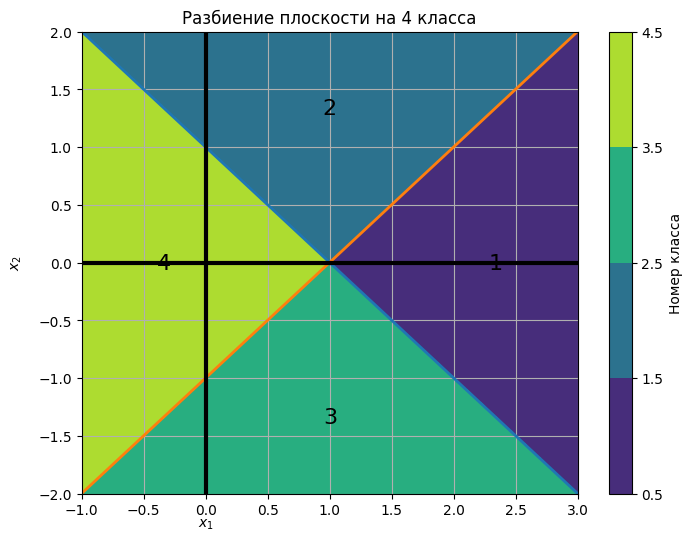

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def H(z):
    return (z > 0).astype(int)

def classify(x1, x2):
    y1 = H(x1 + x2 - 1)
    y2 = H(x1 - x2 - 1)
    return -2*y1 - y2 + 4

x = np.linspace(-1, 3, 600)
y = np.linspace(-2, 2, 600)
X, Y = np.meshgrid(x, y)
Z = classify(X, Y)

plt.figure(figsize=(8, 6))

plt.contourf(X, Y, Z, levels=[0.5, 1.5, 2.5, 3.5, 4.5])
plt.colorbar(label="Номер класса")

plt.plot(x, 1 - x, linewidth=2)
plt.plot(x, x - 1, linewidth=2)

# Оси координат
plt.axhline(0, linewidth=3, color='black', zorder=10)
plt.axvline(0, linewidth=3, color='black', zorder=10)

# Центры областей
for cls in [1, 2, 3, 4]:
    mask = (Z == cls)
    xc = X[mask].mean()
    yc = Y[mask].mean()
    plt.text(xc, yc, str(cls), fontsize=16, ha='center', va='center', zorder=15)

# ----- Настройка подписей осей -----
# Стандартная подпись x1, но смещаем её под точку x=0
plt.xlabel(r'$x_1$', labelpad=10)          # labelpad задаёт отступ от осей
ax = plt.gca()
ax.xaxis.set_label_coords(0.25, -0.05)     # x=0.25 в координатах axes, y=-0.05 (чуть ниже)

# ylabel оставляем как есть (он автоматически по центру слева, что соответствует y=0)
plt.ylabel(r'$x_2$', labelpad=10)

plt.xlim(-1, 3)
plt.ylim(-2, 2)
plt.title("Разбиение плоскости на 4 класса")
plt.grid(True)
plt.show()




#### **Дополнительное замечание**

Если ввести дополнительный признак $z = x_1 \cdot x_2$, можно обойтись одним персептроном, который будет описывать задачу классификации с помощью одной функции активации. Такой персептрон может быть задан уравнением:  
$$
\hat{y} = f(w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot z - \gamma),
$$  
где $z = x_1 \cdot x_2$, а $f(h)$ — активационная функция (например, функция Хевисайда).

Этот подход позволяет напрямую учитывать нелинейные взаимодействия между $x_1$ и $x_2$, которые не могли быть представлены в линейном виде. Таким образом, обучение включает настройку весов $w_1, w_2, w_3$ и порога $\gamma$ для получения правильной классификации.  

Если же дополнительный признак не вводить, то нейросеть решает задачу в два этапа:
1. На первом слое преобразует исходное пространство ($x_1, x_2$) в более сложное представление, добавляя скрытые признаки.  
2. На втором слое производит финальную классификацию с учётом нового представления признаков.  

Это демонстрирует способность нейронных сетей самостоятельно создавать необходимые признаки для эффективного решения задачи.








# 5. Логические функции и их реализация нейронными сетями — итоговый учебный вариант

В этом разделе даётся компактный и строгий учебный разбор двух основных булевых операций — **AND** и **OR**. Для каждой операции последовательно приводятся: таблица истинности, математическая запись, реализация одним персептроном (включая конкретные параметры), геометрическая интерпретация на плоскости $(x_1,x_2)$ и краткое интуитивное объяснение обучения персептрона. В конце раздела рассматриваются общие свойства таких решений и даются практические упражнения.

---

## Вводная таблица истинности (сравнительная)

Ниже представлена общая таблица истинности для трёх основных операций: AND, OR и XOR. В этом разделе мы подробно разбираем только **AND** и **OR**; функция XOR приведена для контраста — она не является линейно разделимой, поэтому не может быть реализована одним персептроном, и будет рассмотрена отдельно в следующем разделе, посвящённом многослойным сетям.

$$
\begin{array}{c c | c c c}
x_1 & x_2 & x_1\land x_2 & x_1\lor x_2 & x_1\oplus x_2 \\ \hline
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 1 \\
1 & 1 & 1 & 1 & 0
\end{array}
$$

---

# 5.1. Логическое «И» — AND

### 1. Определение
$$
y = x_1 \land x_2,\qquad x_1,x_2\in\{0,1\}.
$$
Функция возвращает 1 только тогда, когда оба входа равны 1.

### 2. Таблица истинности
$$
\begin{array}{c c | c}
x_1 & x_2 & y = x_1\land x_2 \\ \hline
0 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
1 & 1 & 1
\end{array}
$$

### 3. Персептронная модель
Рассматриваем простой нейрон с пороговой активацией (функцией Хевисайда):
$$
y =
\begin{cases}
1, & w_1x_1 + w_2x_2 + b > 0,\\[4pt]
0, & w_1x_1 + w_2x_2 + b \le 0.
\end{cases}
$$
Граница между классами задаётся прямой
$$
w_1x_1 + w_2x_2 + b = 0.
$$

### 4. Система условий на параметры
Чтобы персептрон реализовал AND, параметры должны удовлетворять следующей системе неравенств (каждое неравенство соответствует одной из четырёх точек таблицы истинности):
$$
\begin{cases}
b \le 0 & \text{(для точки $(0,0)$)}\\
w_2 + b \le 0 & \text{(для $(0,1)$)}\\
w_1 + b \le 0 & \text{(для $(1,0)$)}\\
w_1 + w_2 + b > 0 & \text{(для $(1,1)$)}.
\end{cases}
$$

### 5. Простой конкретный пример
Положим
$$
w_1 = 1,\quad w_2 = 1,\quad b = -1.5.
$$
Проверка:
$$
\begin{aligned}
(0,0):&\; 0+0-1.5 = -1.5 \le 0 \Rightarrow y=0,\\
(1,0):&\; 1+0-1.5 = -0.5 \le 0 \Rightarrow y=0,\\
(0,1):&\; 0+1-1.5 = -0.5 \le 0 \Rightarrow y=0,\\
(1,1):&\; 1+1-1.5 = 0.5 > 0 \Rightarrow y=1.
\end{aligned}
$$

### 6. Геометрическая интерпретация
Прямая раздела:
$$
x_1 + x_2 - 1.5 = 0 \quad\Longrightarrow\quad x_2 = -x_1 + 1.5.
$$
Полуплоскость $x_1+x_2 > 1.5$ содержит только точку $(1,1)$ (поскольку возможные суммы входов равны 0, 1 или 2). Точки $(0,0), (1,0), (0,1)$ лежат в области $x_1+x_2 \le 1.5$. Таким образом, прямая отделяет класс 1 от класса 0 — функция **линейно разделима**.

### 7. Краткая интуиция обучения (правило персептрона)
Если начальные веса $(w_1,w_2,b)$ не соответствуют нужному поведению, персептрон можно обучить итеративно с помощью простого алгоритма коррекции ошибок (правило Розенблатта):

* Берём точку $(x_1,x_2)$ с известным правильным ответом $y_{\text{true}}$.
* Вычисляем выход модели $y = [w_1x_1+w_2x_2+b > 0]$.
* Если предсказание не совпадает с истинным значением, обновляем веса:
  * если $y_{\text{true}} = 1$, а модель дала $0$: $w_i \leftarrow w_i + \eta\,x_i,\; b \leftarrow b + \eta$;
  * если $y_{\text{true}} = 0$, а модель дала $1$: $w_i \leftarrow w_i - \eta\,x_i,\; b \leftarrow b - \eta$.
  Здесь $\eta > 0$ — небольшой шаг обучения (например, 0.1 или 0.5).

Геометрически это означает сдвиг и поворот разделяющей прямой до тех пор, пока все точки не окажутся по «правильным» сторонам. Для линейно разделимых данных (как в случае AND) алгоритм гарантированно находит решение за конечное число шагов — это утверждение известно как **теорема сходимости персептрона**.



### Основные логические операции

Логические функции могут быть заданы через таблицы истинности. Рассмотрим три основные операции:

1. **Логическое «И» (AND)**: Эта операция возвращает истину (1) только тогда, когда оба входа истинны.
2. **Логическое «ИЛИ» (OR)**: Эта операция возвращает истину, если хотя бы один из входов истинен.
3. **Исключающее ИЛИ (XOR)**: Эта операция возвращает истину, когда входы различны, то есть один из входов истинен, а другой — ложен.

### Таблицы истинности

Для наглядности представим таблицы истинности для каждой из операций:

| Вход 1 (x1) | Вход 2 (x2) | AND (x1 ∧ x2) | OR (x1 ∨ x2) | XOR (x1 ⊕ x2) |
|-------------|-------------|---------------|--------------|----------------|
| 0           | 0           | 0             | 0            | 0              |
| 0           | 1           | 0             | 1            | 1              |
| 1           | 0           | 0             | 1            | 1              |
| 1           | 1           | 1             | 1            | 0              |



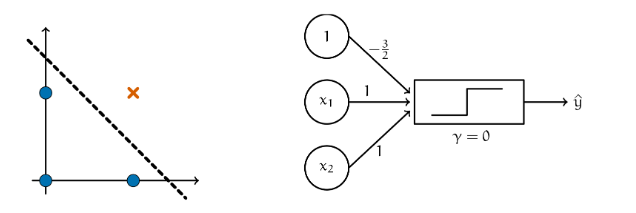



# 5.2. Логическое «ИЛИ» — OR

### 1. Определение
$$
y = x_1 \lor x_2.
$$
Функция возвращает 1, если хотя бы один из входов равен 1.

### 2. Таблица истинности
$$
\begin{array}{c c | c}
x_1 & x_2 & y = x_1\lor x_2 \\ \hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1
\end{array}
$$

### 3. Персептронная модель
Та же модель нейрона:
$$
y =
\begin{cases}
1, & w_1x_1 + w_2x_2 + b > 0,\\
0, & w_1x_1 + w_2x_2 + b \le 0.
\end{cases}
$$

### 4. Система условий на параметры
Для OR неравенства принимают вид:
$$
\begin{cases}
b \le 0 & \text{(для $(0,0)$)}\\
w_2 + b > 0 & \text{(для $(0,1)$)}\\
w_1 + b > 0 & \text{(для $(1,0)$)}\\
w_1 + w_2 + b > 0 & \text{(для $(1,1)$)}.
\end{cases}
$$

### 5. Простой конкретный пример
Положим
$$
w_1 = 1,\quad w_2 = 1,\quad b = -0.5.
$$
Проверка:
$$
\begin{aligned}
(0,0):&\; 0+0-0.5 = -0.5 \le 0 \Rightarrow y=0,\\
(1,0):&\; 1+0-0.5 = 0.5 > 0 \Rightarrow y=1,\\
(0,1):&\; 0+1-0.5 = 0.5 > 0 \Rightarrow y=1,\\
(1,1):&\; 1+1-0.5 = 1.5 > 0 \Rightarrow y=1.
\end{aligned}
$$

### 6. Геометрическая интерпретация
Прямая раздела:
$$
x_1 + x_2 - 0.5 = 0 \quad\Longrightarrow\quad x_2 = -x_1 + 0.5.
$$
Полуплоскость $x_1+x_2 > 0.5$ содержит точки $(1,0), (0,1), (1,1)$; точка $(0,0)$ лежит в области $x_1+x_2 \le 0.5$. Таким образом, OR также **линейно разделима**.


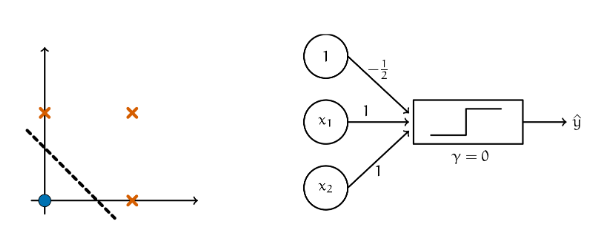


### 7. Интуиция обучения
Аналогично AND: если разделяющая прямая стоит неверно, алгоритм персептрона будет корректировать веса при каждой ошибке. Для OR данные тоже линейно разделимы, поэтому обучение гарантированно приведёт к разделяющей прямой, отделяющей $(0,0)$ от остальных точек.

---

# 5.3. Сравнительное замечание и практические советы

1. **Линейная разделимость.** AND и OR — линейно разделимые функции, поэтому для их реализации достаточно одного персептрона. Функция XOR, как будет показано далее, не является линейно разделимой — её реализация требует хотя бы одного скрытого слоя (многослойный персептрон).

2. **Множество решений.** Если $(w_1,w_2,b)$ — решение (удовлетворяет системе неравенств), то любое положительное масштабирование $(\alpha w_1,\alpha w_2,\alpha b)$ с $\alpha>0$ даёт ту же самую разделяющую прямую, поскольку знак линейной комбинации не меняется. Это означает, что веса не уникальны — важна лишь их относительная ориентация и знак смещения. (Заметим, что данное свойство справедливо именно для пороговой функции активации; для гладких функций, таких как сигмоида, масштабирование меняет крутизну перехода.)

3. **Выбор порога.** Для бинарных входов удобно выбирать дробные смещения вида $-0.5,\,-1.5$ и т.п., поскольку они прямо соответствуют условию на сумму входов: $x_1+x_2 > 1.5$ означает ровно два активных входа (AND), а $x_1+x_2 > 0.5$ означает хотя бы один активный вход (OR).

4. **Реализация в коде.** На практике достаточно реализовать прямое вычисление $y = [w_1x_1 + w_2x_2 + b > 0]$. Для обучения можно использовать описанный выше алгоритм коррекции ошибок. Рекомендуется начинать с нулевых или малых случайных весов и наблюдать, как меняется положение прямой после каждой эпохи.

---

# Упражнения для закрепления

1. Найдите два других набора $(w_1,w_2,b)$, реализующих AND. Постройте соответствующие прямые и отметьте на графике все четыре точки.
2. То же для OR — подберите альтернативные параметры.
3. Реализуйте простой персептрон на Python/NumPy и обучите его (в режиме онлайн или по эпохам) на четырёх точках для AND и OR. Покажите, как меняются $w_1,w_2,b$ при первых 3–5 обновлениях (например, при начальных весах $(0,0,0)$ и шаге $\eta=0.5$).
4. Нарисуйте на бумаге единичный квадрат с четырьмя точками и для каждой из приведённых в разделе прямых визуально убедитесь, какие точки лежат в положительной полуплоскости.



# 5.3. Исключающее «ИЛИ» — XOR

В отличие от AND и OR, функция XOR не является линейно разделимой, поэтому её реализация требует более сложной архитектуры. В этом разделе мы докажем это утверждение, а затем рассмотрим два способа построения нейронной сети для XOR: классическую двухслойную сеть и один персептрон с дополнительным нелинейным признаком.

---

## 1. Определение и таблица истинности

$$
y = x_1 \oplus x_2,\qquad x_1,x_2\in\{0,1\}.
$$

XOR возвращает 1 тогда и только тогда, когда входы различны.

$$
\begin{array}{c c | c}
x_1 & x_2 & y = x_1 \oplus x_2 \\ \hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}
$$

Арифметическая запись (при бинарных входах):
$$
x_1 \oplus x_2 = x_1 + x_2 - 2x_1x_2.
$$

---

## 2. Почему XOR **не** реализуется одним персептроном (простое доказательство)

Персептрон разделяет положительные и отрицательные примеры одной прямой
$$
w_1x_1 + w_2x_2 + b = 0.
$$

Для XOR положительными примерами являются $(1,0)$ и $(0,1)$, а отрицательными — $(0,0)$ и $(1,1)$. Запишем требования к параметрам $w_1,w_2,b$:

$$
\begin{cases}
b \le 0 & \text{(для точки $(0,0)$)}\\
w_1 + b > 0 & \text{(для $(1,0)$)}\\
w_2 + b > 0 & \text{(для $(0,1)$)}\\
w_1 + w_2 + b \le 0 & \text{(для $(1,1)$)}.
\end{cases}
$$

Сложим два строгих неравенства (для $(1,0)$ и $(0,1)$):
$$
(w_1+b) + (w_2+b) > 0 \quad\Longrightarrow\quad w_1 + w_2 + 2b > 0.
$$

Из последнего неравенства (для $(1,1)$) имеем $w_1 + w_2 + b \le 0$. Вычтем его из полученного:
$$
(w_1 + w_2 + 2b) - (w_1 + w_2 + b) = b > 0.
$$

Но первое неравенство требует $b \le 0$. Полученное противоречие ($b>0$ и $b\le0$ одновременно) означает, что не существует таких $w_1,w_2,b$, которые удовлетворяли бы всей системе. Следовательно, одна прямая не может отделить классы — функция XOR **не является линейно разделимой**.

**Геометрически:** положительные точки $(1,0)$ и $(0,1)$ лежат на одной диагонали единичного квадрата, отрицательные $(0,0)$ и $(1,1)$ — на другой. Ни одна прямая не может разделить эти две диагонали.

---

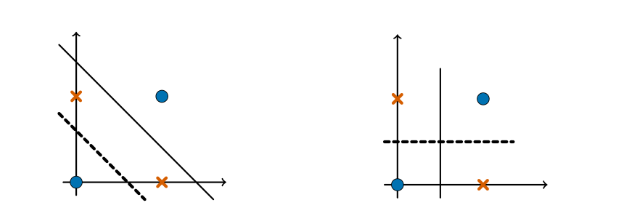

$$
x_1\oplus x_2 = (x_1\land \neg x_2)\ \lor\ (\neg x_1 \land x_2).
$$

или

$$
x1 ^ x2 == (x1 && !x2) || (!x1 && x2)
$$

Сначала построим два скрытых нейрона, реализующих конъюнкции с отрицанием, а затем объединим их с помощью OR.

### Архитектура (один скрытый слой, 2 нейрона → 1 выходной нейрон)

* **Вход:** вектор $x = (x_1,x_2)^\top$.
* **Скрытый слой:** два нейрона с пороговой активацией $f(h)=[h>0]$ (функция Хевисайда). Их параметры подобраны так, чтобы каждый выделял одну из двух комбинаций:
  * Первый скрытый нейрон $h_1$ реализует $x_1 \land \neg x_2$:
$$
 h_1 = [\;1\cdot x_1 + (-1)\cdot x_2 - 0.5 > 0\;].
$$
Если $x_1=1$ и $x_2=0$, то сумма равна $1-0-0.5=0.5>0$, и $h_1=1$; во всех остальных случаях сумма $\le 0$, поэтому $h_1=0$.
 * Второй скрытый нейрон $h_2$ реализует $\neg x_1 \land x_2$:
 $$
 h_2 = [\;(-1)\cdot x_1 + 1\cdot x_2 - 0.5 > 0\;].
 $$
Он срабатывает только при $x_1=0, x_2=1$.
* **Выходной нейрон:** выполняет логическое OR над $h_1$ и $h_2$:

$$
  y = [\;1\cdot h_1 + 1\cdot h_2 - 0.5 > 0\;].
$$
  Это стандартный персептрон для OR с порогом $0.5$ (как в разделе 5.2).

### Проверка для всех четырёх входов

* $(0,0)$: $h_1=0,\;h_2=0 \;\Rightarrow\; y = [0+0-0.5>0] = 0$.
* $(1,0)$: $h_1=[1-0-0.5>0]=1,\;h_2=[-1+0-0.5>0]=0 \;\Rightarrow\; y = [1+0-0.5>0]=1$.
* $(0,1)$: $h_1=0,\;h_2=1 \;\Rightarrow\; y=1$.
* $(1,1)$: $h_1=[1-1-0.5>0]=0,\;h_2=[-1+1-0.5>0]=0 \;\Rightarrow\; y=0$.

Таблица истинности XOR выполнена.

### Матричная запись

Пусть
$$
W^{(1)} = \begin{pmatrix} 1 & -1 \\ -1 & 1 \end{pmatrix},\quad
b^{(1)} = \begin{pmatrix} -0.5 \\ -0.5 \end{pmatrix},\quad
w^{(2)} = \begin{pmatrix} 1 \\ 1 \end{pmatrix},\quad
b^{(2)} = -0.5.
$$
Тогда
$$
H = f(W^{(1)}x + b^{(1)}),\qquad y = f(w^{(2)\top}H + b^{(2)}),
$$
где $f$ применяется покомпонентно (Heaviside).

Это минимальная и наглядная конструкция: один скрытый слой с двумя нейронами позволяет решить XOR.

---

## 4. Геометрическая интерпретация сети

Первый слой рисует две прямые в исходной плоскости $(x_1,x_2)$:

* Прямая для $h_1$: $x_1 - x_2 - 0.5 = 0$ или $x_2 = x_1 - 0.5$. Она отделяет область, где $x_1$ значительно больше $x_2$.
* Прямая для $h_2$: $-x_1 + x_2 - 0.5 = 0$ или $x_2 = x_1 + 0.5$. Она отделяет область, где $x_2$ значительно больше $x_1$.

Каждая из этих прямых создаёт полуплоскость, в которой соответствующий скрытый нейрон активен. Значения $h_1,h_2$ кодируют положение точки относительно этих прямых. Выходной нейрон (OR) объединяет две области, в результате чего положительными оказываются именно те точки, которые лежат по разные стороны от главной диагонали квадрата.





## 5. Альтернатива: один персептрон при добавлении дополнительного признака

Если мы сами добавим нелинейный признак
$$
x_3 = x_1 \cdot x_2,
$$
то задача становится линейно разделимой в трёхмерном пространстве $(x_1,x_2,x_3)$. Действительно, из арифметической формулы
$$
x_1 \oplus x_2 = x_1 + x_2 - 2x_1x_2
$$
следует, что в терминах $x_3$ выражение принимает вид
$$
x_1 \oplus x_2 = x_1 + x_2 - 2x_3.
$$

Поэтому достаточно одного линейного порогового нейрона с весами
$$
w = (1,\;1,\;-2),\qquad b = -0.5,
$$
и правилом
$$
y = [\;w_1 x_1 + w_2 x_2 + w_3 x_3 + b > 0\;].
$$

### Проверка (с учётом $x_3$)

Для каждой комбинации $(x_1,x_2)$ подставим $x_3 = x_1x_2$:

* $(0,0)$: $s = 0+0-0-0.5 = -0.5 \;\Rightarrow\; y=0$.
* $(1,0)$: $s = 1+0-0-0.5 = 0.5 \;\Rightarrow\; y=1$.
* $(0,1)$: $s = 0+1-0-0.5 = 0.5 \;\Rightarrow\; y=1$.
* $(1,1)$: $x_3=1$, $s = 1+1-2-0.5 = -0.5 \;\Rightarrow\; y=0$.

Результат совпадает с таблицей истинности XOR.


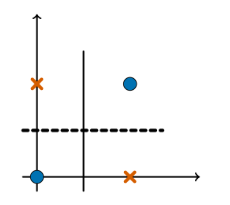


### Геометрическая интерпретация

В трёхмерном пространстве $(x_1,x_2,x_3)$ точки принимают координаты: $(0,0,0)$, $(1,0,0)$, $(0,1,0)$, $(1,1,1). Плоскость $x_1 + x_2 - 2x_3 - 0.5 = 0$ разделяет их: все положительные примеры оказываются по одну сторону, все отрицательные — по другую. Это пример **ручного конструирования признаков** (feature engineering): добавление правильного нелинейного признака линеаризует задачу. В современных нейросетях скрытые слои автоматически извлекают подобные полезные комбинации входов.

---

## 6. Практические замечания и сравнение подходов

* **Минимальная сеть без дополнительных признаков** (один скрытый слой, 2 нейрона, выходной OR) — стандартный и наиболее естественный способ реализовать XOR в нейросетях. Она показывает, как скрытые нейроны могут строить новые признаки ($x_1\land\neg x_2$ и $\neg x_1\land x_2$).
* **С добавлением признака $x_3 = x_1x_2$** задача сводится к одному персептрону в расширенном пространстве. Этот подход демонстрирует принцип: если мы заранее знаем полезные нелинейные зависимости, их можно добавить вручную, упрощая архитектуру.
* **Обучение.** Если использовать пороговые функции активации (Heaviside), обучать такую сеть напрямую сложно из-за разрывности. На практике применяют гладкие активации (например, сигмоиду) и алгоритм обратного распространения ошибки. В упражнениях ниже предлагается попробовать обучение с сигмоидой и градиентным спуском.

---

## 7. Упражнения

1. Реализуйте описанную двухслойную сеть XOR в NumPy с пороговой активацией (Heaviside). Проверьте веса и значения скрытых нейронов для всех входов.
2. Возьмите случайные начальные веса (например, небольшие случайные числа) и попробуйте обучить сеть с сигмоидальной активацией, используя метод градиентного спуска (понадобится вычислять производные). Убедитесь, что сеть сходится и решает XOR.
3. Постройте в плоскости $(x_1,x_2)$ прямые, соответствующие условиям $h_1=0$ и $h_2=0$ (для сети из п. 1). Отметьте области, где $h_1=1$, $h_2=1$, и проверьте, что выходной OR даёт правильную классификацию.
4. Сравните два подхода: (а) один персептрон с признаком $x_3$; (б) двухслойная сеть без $x_3$. Обсудите достоинства и недостатки каждого: сложность, необходимость ручного проектирования признаков, возможность автоматического обучения.

---

## 8. Краткий вывод

* XOR — фундаментальный пример нелинейной задачи, которая **не решается** одним линейным классификатором.
* Минимальная нейросеть для XOR — двухслойная (2 скрытых нейрона + 1 выходной). Скрытые нейроны выполняют роль конструкторов признаков.
* Введение нелинейного признака $x_3 = x_1x_2$ позволяет свести задачу к одному персептрону в трёхмерном пространстве, что иллюстрирует принцип проектирования признаков.
* Этот пример наглядно показывает необходимость многослойных сетей и их способность автоматически извлекать нужные представления из данных.


##7. Минимальное количество нейронов для решения задач классификации

#### Постановка проблемы
Рассмотрим четыре задачи классификации, каждая из которых имеет свою геометрическую интерпретацию. Цель — определить минимальное количество нейронов, необходимое для их решения с использованием многослойной нейронной сети.



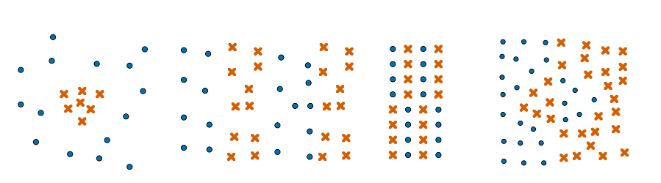


# Задача 1. Классификация точек внутри треугольника

## 1. Постановка задачи

Пусть на плоскости задан треугольник с вершинами  

$$
A(x_A,y_A),\quad B(x_B,y_B),\quad C(x_C,y_C).
$$

Требуется построить нейронную сеть, которая реализует классификацию:

$$
y(x_1,x_2)=
\begin{cases}
1, & \text{если точка } (x_1,x_2) \text{ лежит строго внутри треугольника}, \\[4pt]
0, & \text{иначе}.
\end{cases}
$$

---

## 2. Геометрическая идея решения

Треугольник является **пересечением трёх полуплоскостей**. Каждая сторона треугольника задаётся уравнением прямой:

$$
a_i x_1 + b_i x_2 + c_i = 0,\quad i=1,2,3.
$$

Выберем направление нормали каждой прямой так, чтобы **внутренность треугольника соответствовала положительным значениям** линейной формы. Тогда точка принадлежит треугольнику тогда и только тогда, когда выполняются все три неравенства:

$$
\begin{cases}
a_1 x_1 + b_1 x_2 + c_1 > 0,\\[2pt]
a_2 x_1 + b_2 x_2 + c_2 > 0,\\[2pt]
a_3 x_1 + b_3 x_2 + c_3 > 0.
\end{cases}
$$

Таким образом,

$$
\text{Треугольник} = H_1 \cap H_2 \cap H_3,
$$

где $H_i$ — соответствующая открытая полуплоскость. (Если нужно учитывать границу, можно заменить строгие неравенства на нестрогие, но в нашей постановке граница относится к классу 0.)

---

## 3. Реализация первого слоя (три нейрона)

Используем персептроны с пороговой функцией активации (функцией Хевисайда):

$$
f(s) = [s > 0] =
\begin{cases}
1, & s>0,\\
0, & s\le 0.
\end{cases}
$$

### Нейрон 1 (проверка первой полуплоскости)

$$
h_1 = [a_1 x_1 + b_1 x_2 + c_1 > 0].
$$

### Нейрон 2 (вторая полуплоскость)

$$
h_2 = [a_2 x_1 + b_2 x_2 + c_2 > 0].
$$

### Нейрон 3 (третья полуплоскость)

$$
h_3 = [a_3 x_1 + b_3 x_2 + c_3 > 0].
$$

**Интерпретация:**

* Если точка лежит внутри треугольника, то все три неравенства выполняются, и  
  $h_1 = h_2 = h_3 = 1$.
* Если точка вне треугольника, хотя бы одно из неравенств нарушается, и соответствующий $h_i = 0$.

Первый слой, таким образом, преобразует исходные координаты в трёхмерный бинарный вектор $(h_1,h_2,h_3)$, кодирующий информацию о принадлежности каждой полуплоскости.

---

## 4. Реализация второго слоя (логическое И)

Теперь нужно проверить, что все три условия выполнены одновременно, т.е. вычислить конъюнкцию:

$$
y = h_1 \land h_2 \land h_3.
$$

Конъюнкцию трёх бинарных переменных можно реализовать одним персептроном с весами $1$ и смещением, подобранным так, чтобы сумма превышала порог только когда все переменные равны $1$. Общая формула для $n$ переменных: берём веса $1$ и смещение $-(n-0.5)$. Для $n=3$ это даёт $b = -2.5$:

$$
y = [\,h_1 + h_2 + h_3 - 2.5 > 0\,].
$$

Проверим:

* Если $h_1=h_2=h_3=1$: $1+1+1-2.5 = 0.5 > 0 \Rightarrow y=1$.
* Если хотя бы один из $h_i$ равен $0$, максимальная сумма может быть $2$ (например, $1+1+0$), тогда $2-2.5 = -0.5 \le 0 \Rightarrow y=0$.

Второй слой успешно реализует операцию логического И.

---

## 5. Итоговая архитектура сети

* **Первый слой:** 3 нейрона (по одному на каждую сторону треугольника).
* **Второй слой:** 1 нейрон (выполняет AND трёх сигналов).

Общее количество нейронов: $3 + 1 = 4$.

---

## 6. Матричная запись сети

Обозначим входной вектор $x = (x_1,x_2)^\top$.  
Матрица весов первого слоя и вектор смещений:

$$
W^{(1)} = \begin{pmatrix}
a_1 & b_1 \\
a_2 & b_2 \\
a_3 & b_3
\end{pmatrix},\qquad
b^{(1)} = \begin{pmatrix}
c_1 \\ c_2 \\ c_3
\end{pmatrix}.
$$

Тогда выход первого слоя (вектор скрытых нейронов):

$$
H = f\!\left(W^{(1)} x + b^{(1)}\right),
$$

где $f$ применяется поэлементно, $H = (h_1,h_2,h_3)^\top$.

Второй слой задаётся весовым вектором $w^{(2)} = (1,1,1)^\top$ и смещением $b^{(2)} = -2.5$:

$$
y = f\!\left(w^{(2)\top} H + b^{(2)}\right).
$$

---

## 7. Числовой пример

Рассмотрим треугольник с вершинами $A(0,0)$, $B(2,0)$, $C(0,2)$. Найдём уравнения прямых, содержащих стороны, и выберем нормали так, чтобы внутренность соответствовала положительным значениям.

* **Сторона $AB$:** проходит через $(0,0)$ и $(2,0)$, уравнение $y=0$. Чтобы внутренность (точки выше этой стороны) давала положительное значение, возьмём форму $y > 0$. Тогда $a_1=0,\; b_1=1,\; c_1=0$.
* **Сторона $AC$:** проходит через $(0,0)$ и $(0,2)$, уравнение $x=0$. Внутренность — точки правее, поэтому $x > 0$: $a_2=1,\; b_2=0,\; c_2=0$.
* **Сторона $BC$:** проходит через $(2,0)$ и $(0,2)$, уравнение $x+y-2=0$. Внутренность — точки, для которых $x+y<2$, что равносильно $-x-y+2 > 0$. Значит, берём $a_3=-1,\; b_3=-1,\; c_3=2$.

Параметры первого слоя:

$$
W^{(1)} = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
-1 & -1
\end{pmatrix},\qquad
b^{(1)} = \begin{pmatrix}
0 \\ 0 \\ 2
\end{pmatrix}.
$$

Проверим несколько точек:

* Точка $(1,1)$:  
  $h_1 = [0\cdot1 + 1\cdot1 + 0 > 0] = [1>0] = 1$,  
  $h_2 = [1\cdot1 + 0\cdot1 + 0 > 0] = [1>0] = 1$,  
  $h_3 = [-1\cdot1 -1\cdot1 + 2 > 0] = [0 > 0] = 0$ (строгое неравенство не выполняется, так как $x+y=2$).  
  Поскольку $(1,1)$ лежит точно на гипотенузе, она не считается внутренней, и второй слой выдаст $y = [1+1+0-2.5 > 0] = [-0.5 > 0] = 0$ — верно.

* Точка $(0.5,0.5)$:  
  $h_1 = [0.5>0]=1$, $h_2 = [0.5>0]=1$, $h_3 = [-0.5-0.5+2 = 1 > 0]=1$;  
  $y = [1+1+1-2.5 = 0.5 > 0] = 1$ — точка внутри.

* Точка $(1.5,0)$:  
  $h_1 = [0>0]=0$, $h_2 = [1.5>0]=1$, $h_3 = [-1.5-0+2 = 0.5 > 0]=1$;  
  сумма $h$ равна $2$, $y=0$ — точка вне треугольника (снаружи стороны $AB$).

---

## 8. Геометрическая интерпретация

1. Первый слой проводит **три прямые** (границы полуплоскостей).
2. Каждая прямая делит плоскость на две части; нейрон $h_i$ сигнализирует, находится ли точка в нужной полуплоскости.
3. Треугольник — это область, где **все три сигнала равны 1**.
4. Второй слой реализует операцию **пересечения** (логическое И).

Таким образом, сеть буквально выполняет геометрическое построение: пересечение полуплоскостей даёт треугольник.

---

## 9. Теоретический вывод

* Треугольник — **выпуклый многоугольник**.
* Любой выпуклый многоугольник может быть представлен как пересечение конечного числа полуплоскостей.
* Следовательно, классификатор, выделяющий выпуклый многоугольник на плоскости, всегда можно реализовать **двухслойной сетью** с пороговыми нейронами:
  * первый слой — нейроны, соответствующие каждой полуплоскости;
  * второй слой — один нейрон, выполняющий логическое И над выходами первого слоя.

---

## 10. Обобщение на произвольный многоугольник

Если многоугольник имеет $m$ сторон, то потребуется:

* $m$ нейронов в первом слое (по одному на каждую полуплоскость);
* 1 нейрон во втором слое (AND).

Итого $m+1$ нейрон. Важно, что все полуплоскости должны быть ориентированы внутрь многоугольника. Для невыпуклых многоугольников такая простая схема не работает — потребуются более сложные архитектуры.

---

## Упражнения для закрепления

1. Для треугольника из числового примера ($A(0,0), B(2,0), C(0,2)$) выпишите все веса и смещения в явном виде. Проверьте вручную для точек $(0.2, 1.5)$, $(1.8, 0.1)$, $(1,1)$.
2. Постройте аналогичную сеть для квадрата со сторонами, параллельными осям координат: $x\in(0,2)$, $y\in(0,2)$ (внутренность без границ). Запишите параметры первого слоя и второго слоя.
3. Реализуйте сеть для треугольника на Python/NumPy. Сгенерируйте множество случайных точек в прямоугольнике $[-1,3]\times[-1,3]$ и раскрасьте их в зависимости от предсказания сети. Убедитесь, что треугольник выделяется верно.
4. Докажите, что для любого выпуклого $m$-угольника описанная двухслойная архитектура действительно реализует индикатор его внутренности (при условии правильной ориентации полуплоскостей).
5. Подумайте, как модифицировать сеть, чтобы она включала границу в класс 1. Какие изменения нужно внести в функции активации или пороги?



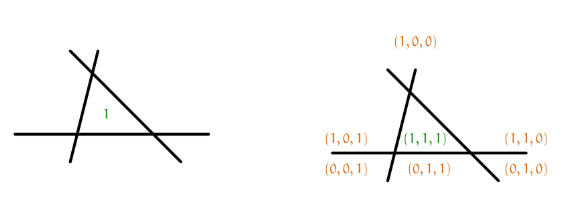



#### Задача 2: Определение положения относительно полос
Необходимо построить три полосы, каждая из которых задаётся двумя линиями. Решение зависит от того, в какой из полос находится точка.


Первый слой должен построить нам три линии. Это три нейрона. Второй слой должен принять решение в какой из полос мы оказались. Будем считать, что если мы попали направо, нейрон выдаёт единицу. Если мы попали налево, ноль. В качестве функции активации используем единичную ступеньку.


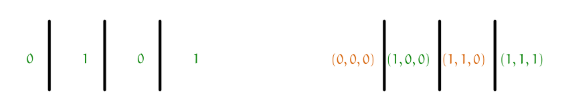

Вопрос в том, хватит ли нам на втором слое одного нейрона для того, чтобы обработать все четыре возможные ситуации. Нам нужно, чтобы выполнялись следующие условия:
   $$
   \begin{cases}
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 1) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 0 + w_3 \cdot 0) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 0) = 0, \\
   f(w_1 \cdot 0 + w_2 \cdot 0 + w_3 \cdot 0) = 0.
   \end{cases}
   $$

Для выполнения условий можно выбрать веса, например: $w_1 = 1$, $w_2 = -2$, $w_3 = 4$.

**Итог:** Всего 4 нейрона — три на первом слое и один на втором.





#### Задача 3: Две задачи XOR, расположенные рядом
3) Оценим число нейронов сверху. Перед нами две XoR задачи, которые лежат рядом с друг-другом. Для решения каждой надо 3 нейрона. Чтобы объединить получившиеся решения нужен ещё один нейрон. Получается трёхслойная сетка с 7 нейронами.
Если мы попробуем подойти к задаче также, как в предыдущем пункте, на втором слое мы получим несовместимую систему из уравнений. То есть третьего слоя точно не избежать.
Можно первым слоем построить 3 линии, вторым решить задачу из предыдущего пункта, а на третьем добавить информацию о том, выше горизонтальной линии мы оказались или ниже. Тогда мы потратим 6 нейронов. Нейросетка получится неполносвязной.




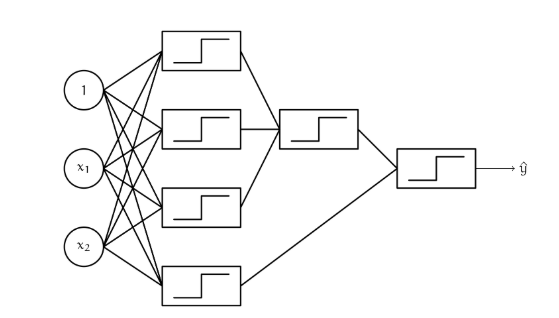


**Итог:**
- Минимальное число нейронов: 6 (неполносвязная сеть).
- Полносвязная сеть потребует 7 нейронов.



#### Выводы
Оптимизация числа нейронов зависит от постановки задачи и свойств сети:
1. В задаче классификации внутри треугольника потребовалось 4 нейрона.
2. Для полос — также 4 нейрона.
3. Для двух XOR задач минимально возможно 6 нейронов.

Каждая задача иллюстрирует, как геометрическое представление помогает определить минимальную архитектуру сети. Решение сложных задач требует учёта всех возможных взаимодействий между признаками, что может потребовать дополнительных слоёв и нейронов.










##8. Универсальный регрессор и классификатор: использование нейронных сетей

#### Постановка задачи
Задача состоит в том, чтобы доказать возможность аппроксимации любой непрерывной функции $f(x)$ на заданном интервале с помощью нейронной сети с произвольной точностью. Для этого предлагается использовать кусочно-линейные функции, представляемые в виде ступенек.



#### Основная идея
Не стоит воспринимать эту задачу как строгое математическое доказательство. Скорее, это «иллюстрация». Мы хотим аппроксимировать функцию $f(x)$ с заданной точностью. Для этого будем использовать кусочно-линейные ступеньки. Чем выше требуемая точность, тем больше ступенек нам понадобится.


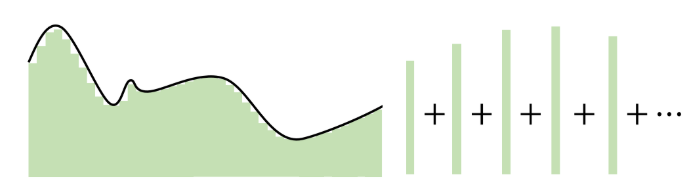



Высоту каждой ступеньки можно задавать по-разному. Чаще всего её определяют как значение функции в середине соответствующего отрезка:  
$$
b_i = f\left(\frac{a_i + a_{i+1}}{2}\right).
$$
Тогда всю функцию можно аппроксимировать суммой:  
$$f(x) \approx \sum_{i=1}^n f\left(\frac{a_i + a_{i+1}}{2}\right) \cdot [a_i \leq x < a_{i+1}].$$

Попробуем описать одну из таких ступенек с помощью нейронной сети. Пусть высота ступеньки равна $b_i$, а ширина — фиксирована и равна $h$. Тогда $a_{i+1} = a_i + h$.


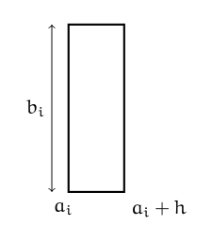


Если значение $x$, для которого мы ищем $f(x)$, попадает в полуинтервал, соответствующий ступеньке, будем аппроксимировать $f(x)$ её высотой. Ступенька состоит из двух границ, которые можно описать двумя условиями:  
$$a_i \leq x < a_i + h.$$
Чтобы проверить эти условия, пара нейронов должна сравнить $x$ с $a_i$ и $a_i + h$. Формально попадание $x$ в ступеньку можно записать так:  
$$1 - [x < a_i] - [x \geq a_i + h].$$  
Если оба условия одновременно не выполняются, результат равен 1, что соответствует попаданию в ступеньку. Если хотя бы одно из условий выполняется, результат становится равным 0, что означает выход за пределы ступеньки. Оба условия не могут выполняться одновременно.




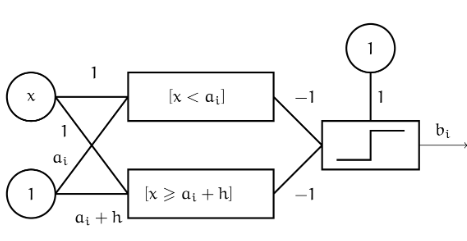

Теперь построим сетку. В качестве функции активации используем единичную ступеньку. Для каждой ступеньки создадим свою «сеть». Если $x$ попадает в конкретную ступеньку, её сеть на втором слое выдаст единичное значение. Это значение мы умножим на $b_i$ и передадим на внешний слой.

Поскольку $x$ может находиться только в одной ступеньке, на выходе сети лишь один слой выдаст значение 1, а все остальные — 0. Внешний слой просуммирует поступившие значения, и мы получим результат аппроксимации.

Чем больше ступенек мы добавляем в модель, тем точнее становится аппроксимация. Впоследствии можно оптимизировать архитектуру, убрав из неё дублирующиеся элементы.


Ниже представлен полностью переработанный и расширенный раздел о подсчёте параметров полносвязной сети. Добавлены:

- таблица с детальным разбиением весов и смещений по слоям;
- анализ влияния изменения числа нейронов;
- оценка требуемой памяти и вычислительной сложности для батча размером $B=32$.

Все формулы оформлены в соответствии с вашим стилем ($...$ для внутристрочных, $$...$$ для выносных). Текст сохраняет учебный, последовательный подход.

---

# 9. Подсчёт числа параметров в полносвязной нейронной сети (учебный стиль)

## Постановка задачи

Дана полносвязная (fully-connected) сеть с архитектурой:

- размер входа $n_0 = 12$;
- три скрытых слоя: $n_1 = 300$, $n_2 = 200$, $n_3 = 100$;
- выходной слой: $n_4 = 1$.

Требуется:

1. Вычислить общее число обучаемых параметров (весов и смещений).
2. Представить разбиение по слоям в виде таблицы.
3. Показать, как изменится общее число параметров при изменении числа нейронов в одном из слоёв.
4. Оценить объём памяти, необходимый для хранения параметров и промежуточных активаций, а также вычислительную сложность (число операций) для одного прямого прохода с батчем размера $B = 32$.

---

## 1. Общее правило для полносвязного слоя

Для полносвязного слоя, переходящего от слоя с $n_{\text{in}}$ нейронами к слою с $n_{\text{out}}$ нейронами, число параметров равно

$$
\text{параметров}_{\text{слоя}} = n_{\text{out}} \cdot n_{\text{in}} + n_{\text{out}},
$$

где

- $n_{\text{out}} \cdot n_{\text{in}}$ — число весов (каждый из $n_{\text{out}}$ нейронов имеет вес для каждого из $n_{\text{in}}$ входов);
- $n_{\text{out}}$ — число смещений (по одному bias на нейрон).

Компактная форма:

$$
\text{параметров}_{\text{слоя}} = (n_{\text{in}} + 1) \cdot n_{\text{out}}.
$$

---

## 2. Пошаговый расчёт параметров по слоям

### 2.1. Первый скрытый слой ($n_0 = 12 \to n_1 = 300$)

- $n_{\text{in}} = 12$, $n_{\text{out}} = 300$.
- Параметров: $(12 + 1) \cdot 300 = 13 \cdot 300 = 3900$.
  - весов: $12 \cdot 300 = 3600$;
  - смещений: $300$.

### 2.2. Второй скрытый слой ($n_1 = 300 \to n_2 = 200$)

- $n_{\text{in}} = 300$, $n_{\text{out}} = 200$.
- Параметров: $(300 + 1) \cdot 200 = 301 \cdot 200 = 60\,200$.
  - весов: $300 \cdot 200 = 60\,000$;
  - смещений: $200$.

### 2.3. Третий скрытый слой ($n_2 = 200 \to n_3 = 100$)

- $n_{\text{in}} = 200$, $n_{\text{out}} = 100$.
- Параметров: $(200 + 1) \cdot 100 = 201 \cdot 100 = 20\,100$.
  - весов: $200 \cdot 100 = 20\,000$;
  - смещений: $100$.

### 2.4. Выходной слой ($n_3 = 100 \to n_4 = 1$)

- $n_{\text{in}} = 100$, $n_{\text{out}} = 1$.
- Параметров: $(100 + 1) \cdot 1 = 101$.
  - весов: $100$;
  - смещений: $1$.

---

## 3. Сводная таблица параметров по слоям

| Слой | Входов ($n_{\text{in}}$) | Нейронов ($n_{\text{out}}$) | Весов | Смещений | Всего параметров |
|:----:|:------------------------:|:---------------------------:|------:|---------:|-----------------:|
| 1    | 12                       | 300                         | 3 600 | 300      | 3 900            |
| 2    | 300                      | 200                         | 60 000| 200      | 60 200           |
| 3    | 200                      | 100                         | 20 000| 100      | 20 100           |
| 4    | 100                      | 1                           | 100   | 1        | 101              |
| **Всего** | | | **83 700** | **601** | **84 301** |

*Примечание:* общее число весов $= 3600+60000+20000+100 = 83\,700$, общее число смещений $= 300+200+100+1 = 601$, сумма $84\,301$.

---

## 4. Изменение числа параметров при модификации архитектуры

Рассмотрим, как изменится общее число параметров, если в **первом скрытом слое** увеличить количество нейронов с $300$ до $350$ (при неизменных остальных слоях).

- Было: $n_1 = 300$.
- Стало: $n_1' = 350$.

Изменения затронут два слоя:
- **Первый слой** (вход $\to$ новый $n_1'$): было $(12+1)\cdot300 = 3900$, стало $(12+1)\cdot350 = 13\cdot350 = 4550$. Увеличение на $4550-3900 = 650$ параметров.
- **Второй слой** (новый $n_1' \to n_2=200$): было $(300+1)\cdot200 = 60\,200$, стало $(350+1)\cdot200 = 351\cdot200 = 70\,200$. Увеличение на $70\,200-60\,200 = 10\,000$ параметров.

Общее увеличение: $650 + 10\,000 = 10\,650$ параметров.

Таким образом, новая общая сумма составит $84\,301 + 10\,650 = 94\,951$.

Аналогично можно рассчитать эффект от изменения числа нейронов в любом слое, учитывая, что это влияет на два смежных слоя (кроме входного и выходного, где меняется только один слой).

---

## 5. Оценка памяти и вычислительной сложности для батча размера $B = 32$

### 5.1. Память для хранения параметров

Если параметры хранятся в формате `float32` (4 байта), то память под веса и смещения:

$$
84\,301 \times 4 = 337\,204 \text{ байт} \approx 329\ \text{КБ} \ (\text{или }0.33\ \text{МБ}).
$$

Для `float64` (8 байт) потребуется $674\,408$ байт $\approx 659$ КБ.

### 5.2. Память для хранения активаций при прямом проходе

При обучении с использованием обратного распространения обычно необходимо сохранять выходы каждого слоя (активации) для последующего вычисления градиентов. Для батча размера $B$ выход каждого $l$-го слоя имеет размерность $B \times n_l$. В нашей сети:

- Входные данные (можно не хранить, но часто хранят): $B \times 12$.
- Выход 1-го слоя: $B \times 300$.
- Выход 2-го слоя: $B \times 200$.
- Выход 3-го слоя: $B \times 100$.
- Выход 4-го слоя: $B \times 1$.

Если хранить все активации в `float32`, суммарное число чисел:

$$
B \cdot (12 + 300 + 200 + 100 + 1) = 32 \cdot 613 = 19\,616.
$$

Объём памяти:

$$
19\,616 \times 4 = 78\,464 \text{ байт} \approx 76.6\ \text{КБ}.
$$

Дополнительно могут храниться градиенты для каждого слоя (примерно такой же объём), а также входные данные и выходы для каждого слоя при обратном проходе. В сумме для активаций и градиентов можно заложить около $2\times$ от указанной величины, т.е. примерно $150$–$160$ КБ.

Таким образом, общая память, необходимая для работы с батчем (параметры + активации + градиенты), составит порядка $0.5$–$1$ МБ, что совсем немного для современных GPU/CPU.

### 5.3. Вычислительная сложность (число операций) для одного прямого прохода

Для полносвязного слоя с входной размерностью $n_{\text{in}}$ и выходной $n_{\text{out}}$ при батче $B$ основная вычислительная работа приходится на умножение матрицы входов размера $B \times n_{\text{in}}$ на матрицу весов размера $n_{\text{in}} \times n_{\text{out}}$, что требует $B \cdot n_{\text{in}} \cdot n_{\text{out}}$ операций умножения и примерно столько же сложений. Обычно объединяют в одно умножение-сложение (MAC) и считают за одну флоп-операцию. Добавление смещения добавляет $B \cdot n_{\text{out}}$ операций сложения.

Приближённо число операций с плавающей точкой (FLOP) для прямого прохода можно оценить как сумму по слоям:

$$
\text{FLOP}_{\text{forward}} \approx \sum_{l=1}^{L} B \cdot n_{l-1} \cdot n_l.
$$

(Умножение и сложение для каждого выходного нейрона и каждого элемента батча; смещения добавляют ещё $B \cdot n_l$, но в первом приближении ими можно пренебречь, так как они дают вклад меньшего порядка.)

Для нашей сети:

- Слой 1: $32 \cdot 12 \cdot 300 = 115\,200$
- Слой 2: $32 \cdot 300 \cdot 200 = 1\,920\,000$
- Слой 3: $32 \cdot 200 \cdot 100 = 640\,000$
- Слой 4: $32 \cdot 100 \cdot 1 = 3\,200$

Сумма: $115\,200 + 1\,920\,000 + 640\,000 + 3\,200 = 2\,678\,400$ операций (умножений, примерно столько же сложений). Обычно под FLOP понимают каждую элементарную операцию отдельно, поэтому можно сказать, что прямой проход требует около $2.7$ миллионов умножений и столько же сложений, т.е. примерно $5.4$ миллиона FLOP.

Для обратного прохода (вычисление градиентов) требуется примерно в два-три раза больше операций, так что общая вычислительная нагрузка на один шаг обучения (прямой + обратный) составит порядка $10$–$15$ миллионов FLOP. Для современных GPU это ничтожная величина.

---

## 6. Заключение

- Полносвязная сеть с архитектурой $12 \to 300 \to 200 \to 100 \to 1$ содержит **84 301** обучаемый параметр.
- Сводная таблица наглядно показывает распределение весов и смещений по слоям.
- Изменение числа нейронов в одном слое влияет на два смежных слоя; приведён пример увеличения первого скрытого слоя с 300 до 350 нейронов, что добавляет 10 650 параметров.
- Для батча размера $B=32$ память под параметры составляет около $0.33$ МБ (float32), под активации и градиенты — ещё менее $0.2$ МБ. Вычислительная сложность прямого прохода — около $5.4$ млн FLOP, что делает такую сеть крайне лёгкой для обучения даже на CPU.

---

## Упражнения для закрепления

1. Постройте аналогичную таблицу для сети $20 \to 128 \to 64 \to 10$ (классификация на 10 классов). Сколько всего параметров?
2. Пусть в исходной сети (12→300→200→100→1) мы хотим заменить второй скрытый слой на слой с 256 нейронами. На сколько изменится общее число параметров?
3. Оцените минимальный размер батча, при котором память для хранения активаций превысит 1 МБ (float32).
4. Рассчитайте число FLOP для прямого прохода сети из упражнения 1 при батче 128.

1. https://ruder.io/optimizing-gradient-descent/